# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [3]:
%pip install numpy matplotlib scikit-learn pandas

     |████████████████████████████████| 11.3 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 58.0 MB/s eta 0:00:01
     |████████████████████████████████| 346 kB 81.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [5]:
import numpy as np

def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Center the data (subtract the mean of the training set from both train and test sets)
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean

    # Step 2: Compute the covariance matrix for the training data
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)

    # Step 3: Compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 4: Discard complex parts (if any) and keep only the real part
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)

    # Step 5: Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 6: Select the top n_components eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Step 7: Project the centered training and test data onto the new subspace
    X_train_reduced = np.dot(X_train_centered, selected_eigenvectors)
    X_test_reduced = np.dot(X_test_centered, selected_eigenvectors)

    # Ensure the resulting matrices are 2D
    if X_train_reduced.ndim == 1:
        X_train_reduced = X_train_reduced.reshape(-1, n_components)
    if X_test_reduced.ndim == 1:
        X_test_reduced = X_test_reduced.reshape(-1, n_components)

    # Return the top 5 singular vectors (principal components) along with the reduced datasets
    top_5_singular_vectors = selected_eigenvectors[:, :5]  # Return top 5 eigenvectors (principal components)

    return X_train_reduced, X_test_reduced, top_5_singular_vectors


## Part 3: Train Logistic Regression and Measure Performance

In [6]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [7]:
svd_components = [784, 300, 150, 100, 50, 25, 10]

# Store the results
results = []
singular_vectors_list = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, top_singular_vectors = apply_svd_custom(X_train, X_test, n_components)
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((n_components, accuracy, training_time))
    singular_vectors_list.append(top_singular_vectors)
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9207, Training time: 286.4206 seconds
Applying custom SVD with 300 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9206, Training time: 72.7868 seconds
Applying custom SVD with 150 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 150, Accuracy: 0.9197, Training time: 27.3987 seconds
Applying custom SVD with 100 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 16.0444 seconds
Applying custom SVD with 50 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 4.5615 seconds
Applying custom SVD with 25 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.8855, Training time: 1.7617 seconds
Applying custom SVD with 10 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8035, Training time: 0.3849 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


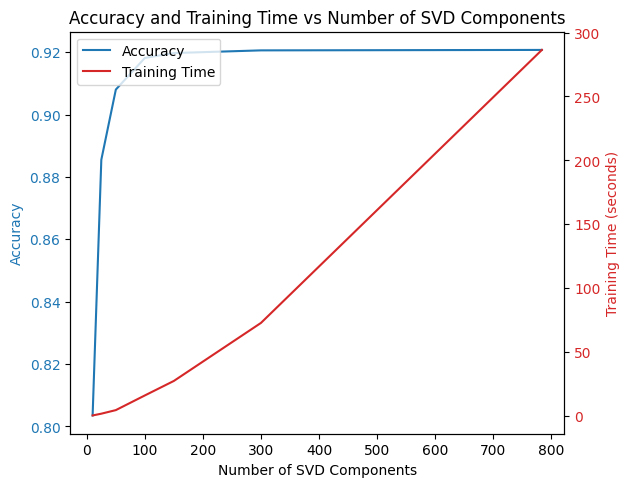

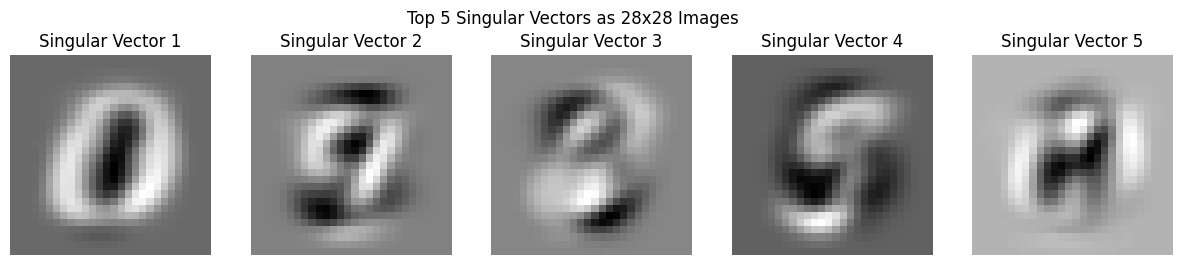

In [8]:
components = [result[0] for result in results]
accuracies = [result[1] for result in results]
training_times = [result[2] for result in results]

fig, ax1 = plt.subplots()

# Plot accuracy
ax1.set_xlabel('Number of SVD Components')
ax1.set_ylabel('Accuracy', color='tab:blue')
accuracy_line, = ax1.plot(components, accuracies, color='tab:blue', label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create another y-axis for training time
ax2 = ax1.twinx()
ax2.set_ylabel('Training Time (seconds)', color='tab:red')
training_time_line, = ax2.plot(components, training_times, color='tab:red', label='Training Time')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()  # Adjust layout for readability

# Combine the two lines into a single legend
lines = [accuracy_line, training_time_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.title("Accuracy and Training Time vs Number of SVD Components")
plt.show()

# Visualize the top 5 singular vectors (reshaped to 28x28 images)
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle('Top 5 Singular Vectors as 28x28 Images')

for i in range(5):
    singular_vector_image = singular_vectors_list[0][:, i].reshape(28, 28)
    axs[i].imshow(singular_vector_image, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Singular Vector {i+1}")

plt.show()


## Part 6: Analyze / Conclusion

YOUR ANSWER: From the graph, see that accuracy grows sharply from SVD components 0 to 200. Which is to be expected, from lab and lecture we know that if the components are too way too little, the accuracy will be low, but at a fraction of the max components we can get away with really good accuracy. For example components at a fraction of max components (Around 1/4 of the max components at 200 components), The accuracy is around the same as the the max components/no reductions (784 components).  Training time increases linearly with the number of SVD components. The more components that needs to be processed, the longer the time. SVD compresses the amount of information that the regression would need to work with, speeding up the process, at the cost of trivial amount of accuracy. In terms of the 5 singular vectors. We see that Singular Vector 1, 0 is very easy to differentiate, because it has low variance with the other numbers in the database, as it is the most consistent in the database (look alike). Singular Vector 3, on the other hand, we can make out to be 3, but it is much harder, that is because it has high variance, different handwriting styles result in more variability. SVD captures this variability in the later singular vectors, which results in a blurry, hard to recognize image.